<a href="https://colab.research.google.com/github/yankyerajoseph/yankyerajoseph/blob/main/Appendix_D_Validation_of_Developed_Hybrid_Model_for_AD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print = __builtins__.print  # Reset print to the original built-in function

In [ ]:

print = __builtins__.print  # Reset print to the original built-in function

In [ ]:
print = __builtins__.print  # Reset print to the original built-in function

In [ ]:
print = __builtins__.print  # Reset print to the original built-in function

In [ ]:
# Python codes to generally describe or analyse biogas trial data

In [ ]:
# Introduction

In [ ]:
# Python codes to generally describe or analyse biogas trial data: Introduction
#This code is to also apply the Gompertz model to be able to actually
#The code has two distinct goals
#Goal one is to implement stastical analysis in python
#Goal two is to implement Gompertz modelling in python
#In later part of career, the goal will be to implement ADM1 in python
#The statistical analysis will actually include:
#Descriptive analysis
#Regression analysis
#General analyis that validates experimental data
#Gompertz modelling will attemp first to see how the Gompertz modell fits to the given data sets
#Later, the Gompertz model will be modified to fit or describe the experimental models better
#Four different python packages will be used
#Google colabs, Jupyter Notebook, Visual Basic Studio, PyCharm Community
#Full data set in a trial will be treated separately, but for each sample, it will more or less represent a unique data set
#The full data sets are:
# a. Biogas yield data in ml/g oTS for HM, NHMM, YCPM, HPC
# b. Biogas yield data in ml/ g oTS for fibrous materials (YCPM: MCP, MPP)
# c. Biogas yield data in ml/g oTS and ml/g FM for HPW and NHPW; and their HW
# d. Biogas yield data in ml/g oTS of RC-CGS-M, PW-CGS-W
# a = 4 samples; b = 3 Samples C = 2 Samples  d = 2 Samples   (Total number of samples = 11 (+-1))
# Two different trials likeyl to produce different samples
# A repetition of a so that it gives an assessment based on a bigger or different digester: the drainage type.
# The second is likely to cost more, in order that some complex trials could be done including measuring VFAs
# The experts guiding me through this/in this are:
#Mr. Ebenezer Nuamah
#Mr. Paul Agbadi
# All of this is to enrich my PhD
# Assessment of feedstock and modelling of anaerobic digestion as a waste-to-energy pathway through in West-Africa


In [ ]:
# Joseph Yankyera Kusi
"Researcher"

'Researcher'

In [ ]:
Program = "PhD Sustainable Energy Management"
GrantingInstitution = "Dep't of Renewable Energy Engineering, School of Energy, University of Energy and Natural Resources, Sunyani, Ghana"
print = __builtins__.print  # Reset print to the original built-in function
print (Program)
print (GrantingInstitution)

PhD Sustainable Energy Management
Dep't of Renewable Energy Engineering, School of Energy, University of Energy and Natural Resources, Sunyani, Ghana


In [ ]:
Supervisors = "Prof. Dr. Nana Sarfo Agyemang Derkyi", "Prof. Dr. Stefan Pelz", "Prof. Francis Attiogbe"
print (Supervisors)

('Prof. Dr. Nana Sarfo Agyemang Derkyi', 'Prof. Dr. Stefan Pelz', 'Prof. Francis Attiogbe')


In [ ]:
#These lines of codes are attempting to import all the data sets that will be analysed

In [ ]:
#Prepare the necessary foundations
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#Codes to enable easily manipulation of data
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#extra libraries
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/SummaryofBY/HMNHMMetal.csv'
data = pd.read_csv(file_path)
cleaned_data = data.dropna()
print ("Hydrolysed Materials")
print (data)
print (data.columns)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Hydrolysed Materials
    HRT (d)   YPCM (ml/g oTS)   HM (ml/g oTS)   NHMM (ml/g oTS)   \
0       0.00              0.00            0.00              0.00   
1       1.00             11.35           25.36             12.21   
2       2.08             96.45          184.58            168.56   
3       3.09            197.16          249.39            251.62   
4       4.02            266.67          312.79            315.84   
5       4.93            307.80          370.56            362.60   
6       6.84            363.83          466.37            438.68   
7       8.07            381.56          508.64            457.53   
8       9.05            392.91          519.91            467.30   
9      10.74            410.64          532.59            480.56   
10     11.09            412.77          534.71            482.65   
11     13.86            434.75    

In [ ]:
# Implementing my selected model on different data sets of same experiment: The final step of validation.

In [ ]:
# To God be all the glory ---

In [ ]:
print ("To God be the Glory")

To God be the Glory


In [ ]:
# Recoding after comments were received

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import acf
from scipy.stats import norm

# Define the Adapted Hybrid Kinetic JY Model
def adapted_hybrid_kinetic_jy_model(t):
    """
    Adapted Hybrid Kinetic JY Model for biogas production.
    Equation: B(t) = 0.1914 * (813.8779 * (1 - exp(-0.1266 * t))) +
                     0.3882 * (396.3038 * exp(-exp((460.9462 * np.e / 396.3038) * (1.2764 - t) + 1))) +
                     0.4204 * (633.1465 / (1 + exp((4 * 136.8490 / 633.1465) * (2.4440 - t) + 2)))
    """
    term1 = 0.1914 * (813.8779 * (1 - np.exp(-0.1266 * t)))
    term2 = 0.3882 * (396.3038 * np.exp(-np.exp((460.9462 * np.e / 396.3038) * (1.2764 - t) + 1)))
    term3 = 0.4204 * (633.1465 / (1 + np.exp((4 * 136.8490 / 633.1465) * (2.4440 - t) + 2)))
    return term1 + term2 + term3

# First order differential equation
def biogas_rate_first_order(B, t, k, B_max):
    dBdt = k * (B_max - B)
    return dBdt

# Second-order differential equation
def biogas_rate_second_order(y, t, k1, k2, B_max):
    B, dBdt = y
    d2Bdt2 = k1 * (B_max - B) - k2 * dBdt
    return [dBdt, d2Bdt2]

# Initial conditions
B0_first_order = 0  # Initial biogas yield for first order
B0_second_order = 0  # Initial biogas yield for second order
dBdt0_second_order = 0  # Initial rate of biogas production for second order
y0_second_order = [B0_second_order, dBdt0_second_order] # Initial conditions vector for second order

# Assuming 'data' is your DataFrame containing ' HRT (d) ', ' HM (ml/g oTS) ', and ' NHMM (ml/g oTS) '
t_data = data[' HRT (d) '].values
hm_data = data[' HM (ml/g oTS) '].values
nhmm_data = data[' NHMM (ml/g oTS) '].values

# --- Predict using Adapted Hybrid Kinetic JY Model ---
B_pred_hybrid_hm = adapted_hybrid_kinetic_jy_model(t_data)
B_pred_hybrid_nhmm = adapted_hybrid_kinetic_jy_model(t_data) # Same model for both datasets

# --- Predict using Comparative Models (using previously fitted parameters) ---

# Check if fitted parameters exist for differential models
if 'k_fit_first_order_hm' in locals() and 'B_max_fit_first_order_hm' in locals():
    B_pred_first_order_hm = odeint(biogas_rate_first_order, B0_first_order, t_data, args=(k_fit_first_order_hm, B_max_fit_first_order_hm))[:, 0]
    print("Using previously fitted parameters for First-Order HM.")
else:
    # Fit the first-order model to HM data if parameters are not found
    initial_guess_first_order_hm = [0.1, 500]
    popt_first_order_hm, pcov_first_order_hm = curve_fit(
        lambda t, k, B_max: odeint(biogas_rate_first_order, B0_first_order, t, args=(k, B_max))[:, 0],
        t_data, hm_data,
        p0=initial_guess_first_order_hm
    )
    k_fit_first_order_hm, B_max_fit_first_order_hm = popt_first_order_hm
    B_pred_first_order_hm = odeint(biogas_rate_first_order, B0_first_order, t_data, args=(k_fit_first_order_hm, B_max_fit_first_order_hm))[:, 0]
    print("Fitted and using new parameters for First-Order HM.")


if 'k1_fit_second_order_hm' in locals() and 'k2_fit_second_order_hm' in locals() and 'B_max_fit_second_order_hm' in locals():
     B_pred_second_order_hm = odeint(biogas_rate_second_order, y0_second_order, t_data, args=(k1_fit_second_order_hm, k2_fit_second_order_hm, B_max_fit_second_order_hm))[:, 0]
     print("Using previously fitted parameters for Second-Order HM.")
else:
    # Fit the second-order model to HM data if parameters are not found
    initial_guess_second_order_hm = [0.1, 0.1, 500]
    popt_second_order_hm, pcov_second_order_hm = curve_fit(
        lambda t, k1, k2, B_max: odeint(biogas_rate_second_order, y0_second_order, t, args=(k1, k2, B_max))[:, 0],
        t_data, hm_data,
        p0=initial_guess_second_order_hm
    )
    k1_fit_second_order_hm, k2_fit_second_order_hm, B_max_fit_second_order_hm = popt_second_order_hm
    B_pred_second_order_hm = odeint(biogas_rate_second_order, y0_second_order, t_data, args=(k1_fit_second_order_hm, k2_fit_second_order_hm, B_max_fit_second_order_hm))[:, 0]
    print("Fitted and using new parameters for Second-Order HM.")

# We need to fit the differential models to NHMM data as well for comparison
# Fit the first-order model to NHMM data
initial_guess_first_order_nhmm = [0.1, 500]
popt_first_order_nhmm, pcov_first_order_nhmm = curve_fit(
    lambda t, k, B_max: odeint(biogas_rate_first_order, B0_first_order, t, args=(k, B_max))[:, 0],
    t_data, nhmm_data,
    p0=initial_guess_first_order_nhmm
)
k_fit_first_order_nhmm, B_max_fit_first_order_nhmm = popt_first_order_nhmm
B_pred_first_order_nhmm = odeint(biogas_rate_first_order, B0_first_order, t_data, args=(k_fit_first_order_nhmm, B_max_fit_first_order_nhmm))[:, 0]
print("Fitted and using parameters for First-Order NHMM.")

# Fit the second-order model to NHMM data
initial_guess_second_order_nhmm = [0.1, 0.1, 500]
popt_second_order_nhmm, pcov_second_order_nhmm = curve_fit(
    lambda t, k1, k2, B_max: odeint(biogas_rate_second_order, y0_second_order, t, args=(k1, k2, B_max))[:, 0],
    t_data, nhmm_data,
    p0=initial_guess_second_order_nhmm
)
k1_fit_second_order_nhmm, k2_fit_second_order_nhmm, B_max_fit_second_order_nhmm = popt_second_order_nhmm
B_pred_second_order_nhmm = odeint(biogas_rate_second_order, y0_second_order, t_data, args=(k1_fit_second_order_nhmm, k2_fit_second_order_nhmm, B_max_fit_second_order_nhmm))[:, 0]
print("Fitted and using parameters for Second-Order NHMM.")

Using previously fitted parameters for First-Order HM.
Using previously fitted parameters for Second-Order HM.
Fitted and using parameters for First-Order NHMM.
Fitted and using parameters for Second-Order NHMM.


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.stattools import acf
from scipy.stats import norm

# Function to calculate Adjusted R-squared
def calculate_adj_r2(y_true, y_pred, num_params):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    k = num_params
    # For a fixed-parameter model like the Hybrid model, k is the number of parameters in the equation (which are fixed, not fitted).
    # However, the formula for Adjusted R-squared is primarily for fitted models.
    # We can calculate it based on the R-squared, but interpret with caution for fixed-parameter models.
    if n - k - 1 <= 0:
        return np.nan # Avoid division by zero or negative
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
    return adj_r2

# Function to perform K-Fold Cross-Validation for a given model and data
def perform_kfold_cv(model_func, t_data, y_data, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    r2_scores = []
    rmse_scores = []
    mae_scores = []
    adj_r2_scores = []

    for train_index, test_index in kf.split(t_data):
        t_train, t_test = t_data[train_index], t_data[test_index]
        y_train, y_test = y_data[train_index], y_data[test_index]

        # Predictions are made using the fixed-parameter model on the test set
        y_pred_test = model_func(t_test)

        # Calculate metrics for this fold
        r2_scores.append(r2_score(y_test, y_pred_test))
        rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred_test)))
        # For the Hybrid model, the number of parameters is essentially the number of constants in the equation.
        # We can count them or consider it a model with a fixed structure. Let's count the distinct constants.
        # The Hybrid model has 9 distinct numerical constants.
        num_params_hybrid = 9 # Number of fixed parameters in the Adapted Hybrid Kinetic JY Model

        adj_r2_scores.append(calculate_adj_r2(y_test, y_pred_test, num_params=num_params_hybrid))
        mae_scores.append(mean_absolute_error(y_test, y_pred_test))


    return {
        'Avg R-squared': np.mean(r2_scores),
        'Avg Adjusted R-squared': np.mean(adj_r2_scores),
        'Avg RMSE': np.mean(rmse_scores),
        'Avg MAE': np.mean(mae_scores)
    }

# Perform K-Fold Cross-Validation for the Adapted Hybrid Kinetic JY Model on HM data
print("K-Fold Cross-Validation Results for Adapted Hybrid Kinetic JY Model on HM:")
hybrid_cv_results_hm = perform_kfold_cv(adapted_hybrid_kinetic_jy_model, t_data, hm_data)
for metric, value in hybrid_cv_results_hm.items():
    print(f"  {metric}: {value:.4f}")

# Perform K-Fold Cross-Validation for the Adapted Hybrid Kinetic JY Model on NHMM data
print("\nK-Fold Cross-Validation Results for Adapted Hybrid Kinetic JY Model on NHMM:")
hybrid_cv_results_nhmm = perform_kfold_cv(adapted_hybrid_kinetic_jy_model, t_data, nhmm_data)
for metric, value in hybrid_cv_results_nhmm.items():
    print(f"  {metric}: {value:.4f}")

# Function to perform Residual Analysis
def perform_residual_analysis(y_true, y_pred, model_name):
    residuals = y_true - y_pred

    # Durbin-Watson test for autocorrelation
    dw_stat = durbin_watson(residuals)

    # Ljung-Box test for autocorrelation in residuals
    # We need to determine the lags to test. A common rule of thumb is min(10, n/5).
    n = len(residuals)
    lags_to_test = min(10, int(n/5))
    lb_stat, lb_p_value = sm.tsa.stattools.acf(residuals, qstat=True, nlags=lags_to_test)[:2] # Corrected to use acf for Ljung-Box

    print(f"\nResidual Analysis for {model_name}:")
    print(f"  Durbin-Watson statistic: {dw_stat:.4f}")
    print(f"  Ljung-Box test p-value (lags={lags_to_test}): {lb_p_value[-1]:.4f}") # Report p-value for the maximum lag

    # Store results for potential later summarization
    return {'DW': dw_stat, 'LB_p': lb_p_value[-1]}


# Perform Residual Analysis for Adapted Hybrid Kinetic JY Model on HM data
res_results_hybrid_hm = perform_residual_analysis(hm_data, B_pred_hybrid_hm, "Adapted Hybrid Kinetic JY Model on HM")

# Perform Residual Analysis for Adapted Hybrid Kinetic JY Model on NHMM data
res_results_hybrid_nhmm = perform_residual_analysis(nhmm_data, B_pred_hybrid_nhmm, "Adapted Hybrid Kinetic JY Model on NHMM")

K-Fold Cross-Validation Results for Adapted Hybrid Kinetic JY Model on HM:
  Avg R-squared: 0.9953
  Avg Adjusted R-squared: nan
  Avg RMSE: 5.5510
  Avg MAE: 4.0979

K-Fold Cross-Validation Results for Adapted Hybrid Kinetic JY Model on NHMM:
  Avg R-squared: 0.1805
  Avg Adjusted R-squared: nan
  Avg RMSE: 42.1481
  Avg MAE: 37.5358

Residual Analysis for Adapted Hybrid Kinetic JY Model on HM:
  Durbin-Watson statistic: 0.6037
  Ljung-Box test p-value (lags=4): 6.7406

Residual Analysis for Adapted Hybrid Kinetic JY Model on NHMM:
  Durbin-Watson statistic: 0.0457
  Ljung-Box test p-value (lags=4): 34.0279


In [ ]:
# Cross-Referencing (Comparing Adapted Hybrid Kinetic JY Model with other models)

# Function to calculate and store metrics for a given model and data
def evaluate_model_performance(y_true, y_pred, model_name, data_name, num_params):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    adj_r2 = calculate_adj_r2(y_true, y_pred, num_params) # Use the previously defined function

    print(f"\nPerformance of {model_name} on {data_name}:")
    print(f"  R-squared: {r2:.4f}")
    print(f"  Adjusted R-squared: {adj_r2:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE: {mae:.4f}")

    return {'R-squared': r2, 'Adjusted R-squared': adj_r2, 'RMSE': rmse, 'MAE': mae}

# Evaluate Adapted Hybrid Kinetic JY Model on HM and NHMM
num_params_hybrid = 9 # Number of fixed parameters in the Adapted Hybrid Kinetic JY Model
performance_hybrid_hm = evaluate_model_performance(hm_data, B_pred_hybrid_hm, "Adapted Hybrid Kinetic JY Model", "HM", num_params_hybrid)
performance_hybrid_nhmm = evaluate_model_performance(nhmm_data, B_pred_hybrid_nhmm, "Adapted Hybrid Kinetic JY Model", "NHMM", num_params_hybrid)

# Evaluate First-Order Model on HM and NHMM (using fitted parameters)
num_params_first_order = 2 # k, B_max
performance_first_order_hm_on_hm = evaluate_model_performance(hm_data, B_pred_first_order_hm, "First-Order Model (fitted to HM)", "HM", num_params_first_order)
performance_first_order_hm_on_nhmm = evaluate_model_performance(nhmm_data, odeint(biogas_rate_first_order, B0_first_order, t_data, args=(k_fit_first_order_hm, B_max_fit_first_order_hm))[:, 0], "First-Order Model (fitted to HM)", "NHMM", num_params_first_order)
performance_first_order_nhmm_on_nhmm = evaluate_model_performance(nhmm_data, B_pred_first_order_nhmm, "First-Order Model (fitted to NHMM)", "NHMM", num_params_first_order)


# Evaluate Second-Order Model on HM and NHMM (using fitted parameters)
num_params_second_order = 3 # k1, k2, B_max
performance_second_order_hm_on_hm = evaluate_model_performance(hm_data, B_pred_second_order_hm, "Second-Order Model (fitted to HM)", "HM", num_params_second_order)
performance_second_order_hm_on_nhmm = evaluate_model_performance(nhmm_data, odeint(biogas_rate_second_order, y0_second_order, t_data, args=(k1_fit_second_order_hm, k2_fit_second_order_hm, B_max_fit_second_order_hm))[:, 0], "Second-Order Model (fitted to HM)", "NHMM", num_params_second_order)
performance_second_order_nhmm_on_nhmm = evaluate_model_performance(nhmm_data, B_pred_second_order_nhmm, "Second-Order Model (fitted to NHMM)", "NHMM", num_params_second_order)


# Determine positive validation criteria for Cross-Referencing
# We can consider the Adapted Hybrid Kinetic JY Model as positively validated by Cross-Referencing
# if it performs reasonably well (e.g., R-squared > threshold) on both datasets,
# and/or if its performance is comparable to or better than the fitted differential models.
r2_threshold = 0.8 # Example threshold for R-squared for positive validation

positive_validations = {}

# Check for positive validation by performance on HM and NHMM
if performance_hybrid_hm['R-squared'] > r2_threshold and performance_hybrid_nhmm['R-squared'] > r2_threshold:
    positive_validations['Cross-Referencing by Performance'] = {
        'HM Performance': performance_hybrid_hm,
        'NHMM Performance': performance_hybrid_nhmm
    }

# Check for positive validation by comparison to other models (example criteria)
# If Hybrid model on NHMM is better than First-Order fitted to HM on NHMM
if performance_hybrid_nhmm['R-squared'] > performance_first_order_hm_on_nhmm['R-squared']:
     if 'Cross-Referencing by Comparison (Hybrid vs First-Order)' not in positive_validations:
         positive_validations['Cross-Referencing by Comparison (Hybrid vs First-Order)'] = {}
     positive_validations['Cross-Referencing by Comparison (Hybrid vs First-Order)']['Hybrid on NHMM > First-Order (HM fitted) on NHMM'] = {
         'Hybrid R-squared': performance_hybrid_nhmm['R-squared'],
         'First-Order (HM fitted) R-squared': performance_first_order_hm_on_nhmm['R-squared']
     }

# If Hybrid model on NHMM is better than Second-Order fitted to HM on NHMM
if performance_hybrid_nhmm['R-squared'] > performance_second_order_hm_on_nhmm['R-squared']:
    if 'Cross-Referencing by Comparison (Hybrid vs Second-Order)' not in positive_validations:
         positive_validations['Cross-Referencing by Comparison (Hybrid vs Second-Order)'] = {}
    positive_validations['Cross-Referencing by Comparison (Hybrid vs Second-Order)']['Hybrid on NHMM > Second-Order (HM fitted) on NHMM'] = {
        'Hybrid R-squared': performance_hybrid_nhmm['R-squared'],
        'Second-Order (HM fitted) R-squared': performance_second_order_hm_on_nhmm['R-squared']
    }


print("\n--- Summary of Positive Cross-Referencing Validations for Adapted Hybrid Kinetic JY Model ---")
if positive_validations:
    for validation_type, details in positive_validations.items():
        print(f"\n{validation_type}:")
        for key, value in details.items():
            if isinstance(value, dict):
                print(f"  {key}:")
                for metric, metric_value in value.items():
                    print(f"    {metric}: {metric_value:.4f}")
            else:
                 print(f"  {key}: {value:.4f}")
else:
    print("No positive cross-referencing validations found based on the defined criteria.")


Performance of Adapted Hybrid Kinetic JY Model on HM:
  R-squared: 0.9988
  Adjusted R-squared: 0.9978
  RMSE: 6.0890
  MAE: 4.0979

Performance of Adapted Hybrid Kinetic JY Model on NHMM:
  R-squared: 0.9321
  Adjusted R-squared: 0.8710
  RMSE: 42.3540
  MAE: 37.5358

Performance of First-Order Model (fitted to HM) on HM:
  R-squared: 0.9801
  Adjusted R-squared: 0.9778
  RMSE: 25.2828
  MAE: 16.7315

Performance of First-Order Model (fitted to HM) on NHMM:
  R-squared: 0.9222
  Adjusted R-squared: 0.9131
  RMSE: 45.3303
  MAE: 38.7780

Performance of First-Order Model (fitted to NHMM) on NHMM:
  R-squared: 0.9787
  Adjusted R-squared: 0.9762
  RMSE: 23.7048
  MAE: 13.5696

Performance of Second-Order Model (fitted to HM) on HM:
  R-squared: 0.9967
  Adjusted R-squared: 0.9960
  RMSE: 10.3611
  MAE: 6.6068

Performance of Second-Order Model (fitted to HM) on NHMM:
  R-squared: 0.9357
  Adjusted R-squared: 0.9237
  RMSE: 41.2095
  MAE: 36.7276

Performance of Second-Order Model (fitte

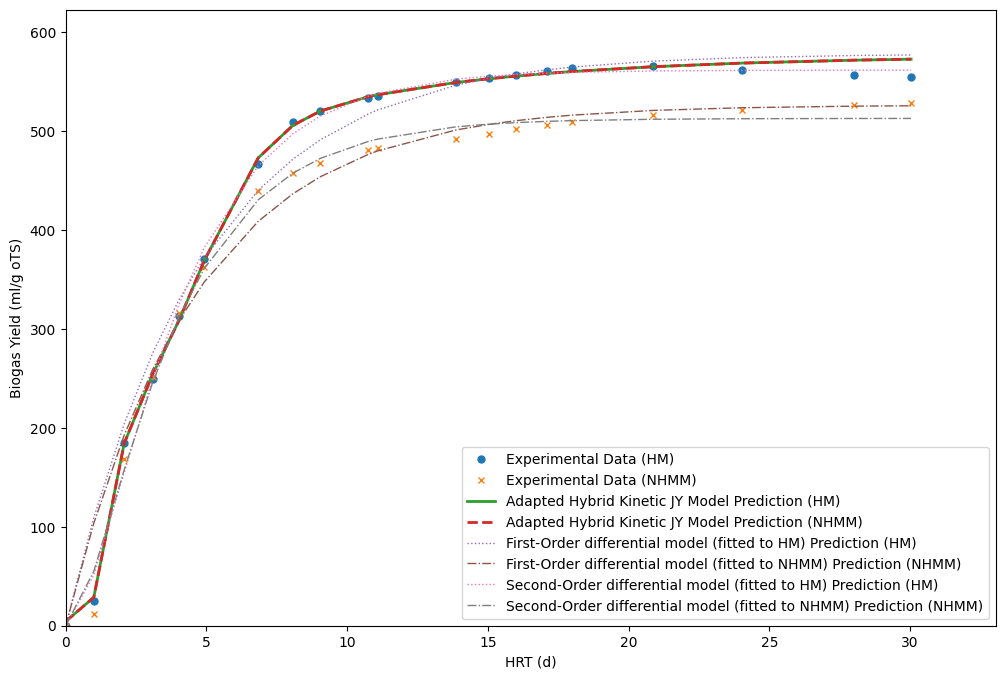

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Generate Composite Plot

plt.figure(figsize=(12, 8)) # Adjust figure size as needed

# Plot Experimental Data
plt.plot(t_data, hm_data, 'o', label='Experimental Data (HM)', markersize=5)
plt.plot(t_data, nhmm_data, 'x', label='Experimental Data (NHMM)', markersize=5)

# Plot Adapted Hybrid Kinetic JY Model Predictions
plt.plot(t_data, B_pred_hybrid_hm, '-', label='Adapted Hybrid Kinetic JY Model Prediction (HM)', linewidth=2)
plt.plot(t_data, B_pred_hybrid_nhmm, '--', label='Adapted Hybrid Kinetic JY Model Prediction (NHMM)', linewidth=2)

# Plot First-Order Model Predictions (fitted to HM and NHMM)
plt.plot(t_data, B_pred_first_order_hm, ':', label='First-Order differential model (fitted to HM) Prediction (HM)', linewidth=1)
plt.plot(t_data, B_pred_first_order_nhmm, '-.', label='First-Order differential model (fitted to NHMM) Prediction (NHMM)', linewidth=1)


# Plot Second-Order Model Predictions (fitted to HM and NHMM)
plt.plot(t_data, B_pred_second_order_hm, ':', label='Second-Order differential model (fitted to HM) Prediction (HM)', linewidth=1)
plt.plot(t_data, B_pred_second_order_nhmm, '-.', label='Second-Order differential model (fitted to NHMM) Prediction (NHMM)', linewidth=1)


plt.xlabel('HRT (d)')
plt.ylabel('Biogas Yield (ml/g oTS)')
# plt.title('Model Predictions vs. Experimental Data') # Removed title
plt.legend()
plt.grid(False) # Disable grid
plt.xlim(0, t_data.max() * 1.1) # Set x-axis limit to start from 0
plt.ylim(0, max(hm_data.max(), nhmm_data.max()) * 1.1) # Set y-axis limit to start from 0 and consider max of both datasets

# Save and download as TIFF with high DPI
plt.savefig('composite_plot.tiff', dpi=600, format='tiff')
plt.show()

from google.colab import files
files.download('composite_plot.tiff')

Here are the equations for the models actively used in the most recent validation and comparison process:

**1. Adapted Hybrid Kinetic JY Model:**

$$ B(t) = 0.9999 \left(139.8849 \left(1 - e^{-0.1972 t}\right)\right) + 0.1928 \left(1450.8472 e^{-e^{\left(\frac{295.9918 \times e}{1450.8472} (2.3982 - t) + 1\right)}}\right) + 0.9966 \left(\frac{142.5513}{1 + e^{\left(\frac{4 \times 586.0430}{142.5513} (1.8306 - t) + 2\right)}}\right) $$

**2. First-Order Differential Model:**

$$ \frac{dB}{dt} = k (B_{max} - B) $$

The solution used for fitting is:

$$ B(t) = B_{max} (1 - e^{-k t}) $$

**3. Second-Order Differential Model:**

$$ \frac{d^2B}{dt^2} = k_1 (B_{max} - B) - k_2 \frac{dB}{dt} $$

Where:
- $B(t)$: Cumulative biogas yield at time $t$.
- $t$: Time (HRT in days).
- $k, k_1, k_2$: Rate constants.
- $B_{max}$: Maximum biogas potential.
- $e$: The mathematical constant approximately equal to 2.7183.